In [67]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np

# Load the model from the .keras file
model = load_model('model_of_image_classification.keras')

In [68]:
model.summary

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [69]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [70]:
from tensorflow.keras.preprocessing import image


def load_and_preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)  # Preprocess input if using a specific model
    return img_array

In [71]:
def predict(model, img_array):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return int(predicted_class)

In [72]:
image_path = '25.jfif'  # Update with your image path
target_size = (32, 32)  # Adjust to match the model input size
img_array = load_and_preprocess_image(image_path, target_size)


In [73]:
predicted_class = predict(model, img_array)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
Predicted class: 3


C:\Users\jayap\AppData\Local\Temp\ipykernel_7192\3899553261.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(predicted_class)


In [74]:
ans=classes[predicted_class]

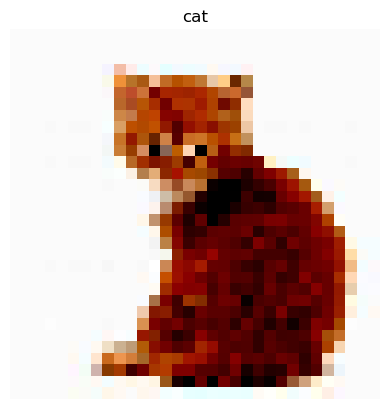

In [75]:
import numpy as np
import matplotlib.pyplot as plt
img_array=img_array.squeeze(0)
img_array = np.clip(img_array, 0, 255) 

plt.imshow(img_array)
plt.title(ans,)
plt.axis('off') 
plt.show()